### Shapes Dataset
We present the "shapes dataset" consisting of a training set of 60,000 examples, and a test set of 10,000 examples. Each example is a 784-dimensional vector, which when reformatted as an image has the appearance of one of 3 shapes - triangle, square or pizza.

Four flat binary data files are available on this site:

Shapes_1_1_Train_Features.dat: training set features (47040000 bytes) 
Shapes_1_1_Train_Labels.dat: training set labels (60000 bytes) 
Shapes_1_1_Test_Features.dat: training set features (7840000 bytes) 
Shapes_1_1_Test_Labels.dat: training set labels (10000 bytes)

Once you import a feature file by reading in all the bytes, you must partition the data into lists of 784 elements. Each of these lists can be viewed as an image of a handwritten digit by reformatting it as a 28x28 matrix.
Questions? Email: shashi@numericinsight.com
www.numericinsight.com

### Unsupervised learning model - EM

In [1]:
import os, struct
import matplotlib as plt
from array import array as pyarray
import pandas as pd
from openpyxl import load_workbook
from pylab import *
from numpy import *
import numpy.linalg as LA

#from pandas import DataFrame
#import math

from sklearn.mixture import GaussianMixture
from numpy.linalg import inv


In [2]:
def load_NMNIST(dataset="training", digits=range(10), path=r'/Users/monikabansal/ucsc/MachineLearning/project/shapes_data'):
    
    if dataset == "training":
        fname_img = os.path.join(path, 'Shapes_1_1_Train_Features.dat')
        fname_lbl = os.path.join(path, 'Shapes_1_1_Train_Labels.dat')
    elif dataset == "testing":
        fname_img = os.path.join(path, 'Shapes_1_1_Test_Features.dat')
        fname_lbl = os.path.join(path, 'Shapes_1_1_Test_Labels.dat')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    flbl = open(fname_lbl, 'rb')
    lbl = np.fromfile(flbl, dtype=np.uint8)
    flbl.close()

    fimg = open(fname_img, 'rb')
    img = np.fromfile(fimg, dtype=np.uint8)
    fimg.close()

    size=len(lbl)

    ind = [ k for k in range(size) if lbl[k] in digits ]
    N = len(ind)

    rows=28;cols=28;

    images = zeros((N, rows, cols), dtype=uint8)
    labels = zeros((N, 1), dtype=int8)
    for i in range(len(ind)):
        images[i] = array(img[ ind[i]*rows*cols : (ind[i]+1)*rows*cols ]).reshape((rows, cols))
        labels[i] = lbl[ind[i]]
    return images, labels

In [3]:
def vectortoimg(v,show=True):
    plt.imshow(v.reshape(28, 28),interpolation='None', cmap='gray')
    plt.axis('off')
    if show:
        plt.show()

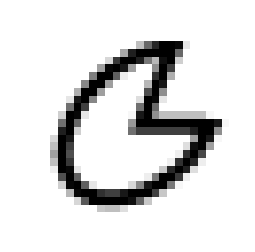

X: (60000, 784)
T: (60000, 1)


In [4]:
images, labels = load_NMNIST('training', digits=[0,1,2])

flatimages = list()
for i in images:
    flatimages.append(i.ravel())
X = asarray(flatimages) # X now contains 60000 feature vectors, each of dimension 784
T=labels # T contains class labels with 0->Triangle, 1->Square, 2->Pizza
vectortoimg(X[1])

print("X:" , X.shape)#, X[20:22,300:400])
print("T:" , T.shape)#, T)


Checking multiple training vectors by plotting images.
Be patient:


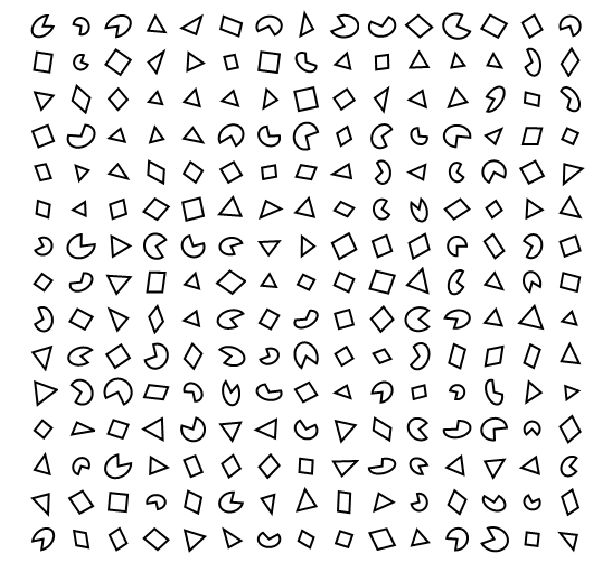

In [5]:
print("Checking multiple training vectors by plotting images.\nBe patient:")
plt.close('all')
fig = plt.figure(figsize=(10,10))
nrows=15
ncols=15
for row in range(nrows):
    for col in range(ncols):
        #print("row*ncols+col + 1", row*ncols+col + 1)
        plt.subplot(nrows, ncols, row*ncols+col + 1)
        vectortoimg(X[row*ncols+col + 1],show=False)
        #vectortoimg(X[np.random.randint(len(T))],show=False)
plt.show()

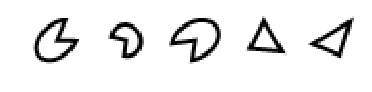

In [7]:
#Checking multiple training vectors by plotting images
def vectortoimgMlt(X,T,nrows,ncols):
    plt.close('all')
    fig = plt.figure()
    for row in range(nrows):
        for col in range(ncols):
            plt.subplot(nrows, ncols, row*ncols+col + 1)
            vectortoimg(X[row*ncols+col + 1],show=False)          
            #vectortoimg(X[np.random.randint(len(T))],show=False)
    plt.show()
    
vectortoimgMlt(X,T,1,5) # plot first 1 to 5

In [8]:
# Split result into classes - upto 5 classes

def splitDataIntoClasses(P,T):
    P1 = []
    P2 = []
    P3 = []       
    P4 = []
    P5 = []
    for i,j in enumerate(P):
        #print("i=",i , " j= ",j,"X[i]=", X[i])
        if(T[i] == 0) : 
            P1.append(j)
        elif(T[i] == 1) : 
            P2.append(j)
        elif(T[i] == 2) : 
            P3.append(j)
        elif(T[i] == 3) : 
            P4.append(j)
        else :
            P5.append(j)
    return(np.array(P1),np.array(P2),np.array(P3),np.array(P4),np.array(P5)) 

### Building XZCVPR -> to reduce from 784 dims to 2 Principal Component dims

Mean vector: (784,)
Checking min/max values for xmean: (156.24005, 255.0)


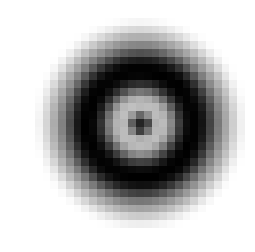

Z: (60000, 784)
Checking min/max values for Z: (-254.7701, 98.75995)


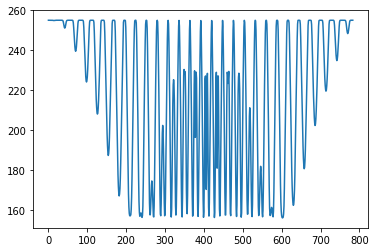

In [9]:
# Finding the Mean vector mu
xmean = np.mean(X, axis=0) #, dtype=np.float64)
print("Mean vector:", xmean.shape)

mu = xmean

print("Checking min/max values for xmean:",(np.amin(xmean),np.amax(xmean)))

vectortoimg(xmean)
plt.plot(xmean)

# Z computations Z = X - xmean
Z=X-xmean
print("Z:", Z.shape)
print("Checking min/max values for Z:",(np.amin(Z),np.amax(Z)))

#print("X vector:", X[10])
#print("Z vector:", Z[10])

# Verify Z , by computing mean vector of Z. The result must be vector of 0s 
zmean = np.mean(Z, axis=0)
#print("Mean vector of Z:", zmean) # close to 0s, but not 0


### Building XZ -> C

Shape of C:  (784, 784)
5232.550150391395
C.T == C ..
5232.550150391395


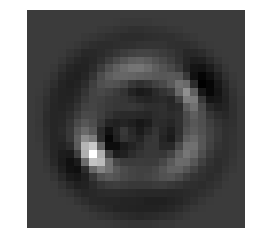

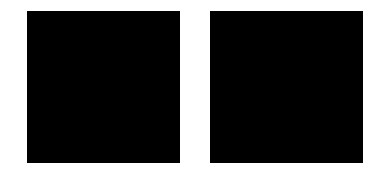

In [10]:
C=np.cov(Z,rowvar=False)
print("Shape of C: ", C.shape)
print(C[100,100])
print("C.T == C ..")
print(C.T[100,100])

vectortoimg(C[512])
vectortoimgMlt(C,C,1,2)

### Computing XZC->V , Eigen Vector V

Norm check for Eigen Vector 1: 1.0000000000000002
Norm check for Eigen Vector 2: 1.0
Dot product of 2 Eigen vectors: 2.0122792321330962e-16


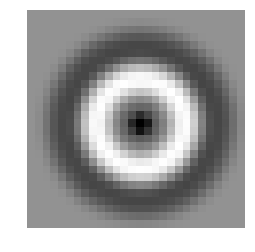

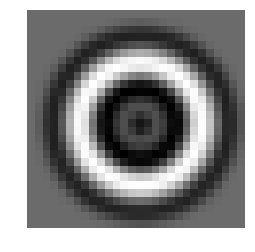

(784, 784)

In [11]:

[λ,V]=LA.eigh(C) # Compute Eigen Vector V and Eigen Value λ

#print(lamda,'\n\n',V)
row=V[-1,:];
col=V[:,-1];

#np.dot(C,row)-(λ[-1]*row) #If the matrix product C.row is the same as λ[-1]*row, this should evaluate to [0,0,0]
#np.dot(C,col)-(λ[-1]*col) #If the matrix product C.col is the same as λ[-1]*col, this should evaluate to [0,0,0]
#So we conclude that the columns of V are the eigenvectors. 

#For notational agreement with the Lecture Notes, we will set V to its own transpose. 
#We also need to reverse the order of eigenvectors and eigenvalues so that they are ordered in decreasing 
#order of importance.

λ=np.flipud(λ);
V=np.flipud(V.T);  # Transpose V and reverse the order of eigen values

row=V[0,:]; #Check once again
#np.dot(C,row)-(lamda[0]*row) #If the matrix product C.row is the same as λ[0]*row, this should evaluate to [0,0,0]

#Note that another way of checking equality of two arrays is to use np.allclose
np.allclose(np.dot(C,row),λ[0]*row)

#Norm Check. Eigen Vectors are unit vectors. Values should be 1
print("Norm check for Eigen Vector 1:" , np.linalg.norm(V[0]))
print("Norm check for Eigen Vector 2:" , np.linalg.norm(V[1]))

# Orthogonality Check, dot product of first 2 eigen vectors must be close to 0
print("Dot product of 2 Eigen vectors:" ,np.dot(V[0,:],V[1,:]))

vectortoimg(V[0])
vectortoimg(V[1])# size=3

v1 = V[0]
v2 = V[1]

V.shape # 784x784

### Computing XZCV -> P

In [12]:
P=np.dot(Z,V.T);
print(P) #Principal components

P.shape
# Compute Pred - P reduced into 2 Principal components
Pred = P[:,0:2]
print("Pred:" , Pred.shape)  # Nx2
PredM = np.mean(Pred,axis=0)  # Mean of Pred is close to 0
print("Mean of Pred:", PredM)
Pred.dtype



Pred3 = P[:,0:3]
Pred10 = P[:,0:10]

[[ 1.25954248e+03  8.39032679e+02  6.95421574e+01 ... -2.65996277e-13
   5.48478940e-12  4.68847072e-12]
 [ 7.18017489e+02 -2.65988836e+02  8.07960842e+01 ...  1.09294332e-11
   6.33034609e-12 -9.73108180e-12]
 [-2.91056701e+02 -5.33266962e+02 -4.40133730e+02 ...  5.43020543e-12
  -2.19124305e-12 -5.04296171e-12]
 ...
 [-8.00209680e+02  3.31638478e+02  2.98635512e+02 ...  4.74380972e-12
   1.65687593e-12  6.98609455e-14]
 [-2.41043473e+02 -7.73424766e+02 -3.35034145e+02 ... -1.43520928e-12
  -2.90479466e-12 -3.17212576e-12]
 [ 9.10571163e+02 -8.20679879e+02  2.41582914e+02 ...  7.98809600e-13
  -2.90005095e-12  1.79050370e-12]]
Pred: (60000, 2)
Mean of Pred: [-1.67976092e-13  2.75425312e-14]


### Computing XZCVP -> R (reconstructed Z)

In [13]:
R=np.dot(P,V);
print(R-Z) #Z is recovered since R-Z seems to contain very small values

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Xrec  (Reconstructed X)

In [14]:
Xrec = R + xmean;
print(Xrec-X) #X is recovered since Xrec-X seems to contain very small values

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Reconstructing X using 2 Principal components - for verification purposes

[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]
(60000, 784)


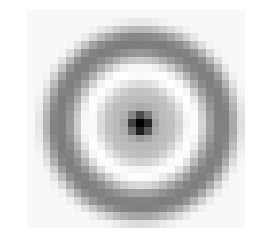

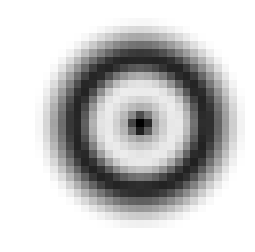

In [15]:
#Images obtained by reconstructing a few selected samples using 2 principal components

Xrec2=(np.dot(P[:,0:2],V[0:2,:])) + xmean;
print(Xrec2) #Reconstruction using 2 components

print(Xrec2.shape)  # N x d

vectortoimg(Xrec2[0])
vectortoimg(Xrec2[1])

(60000, 2)


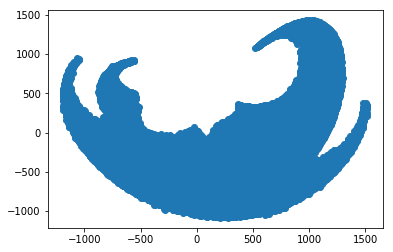

In [16]:
# Scatter plot ............
plt.scatter(Pred[:,0],Pred[:,1])
print(Pred.shape)

T= (60000, 1)
P= (60000, 784)


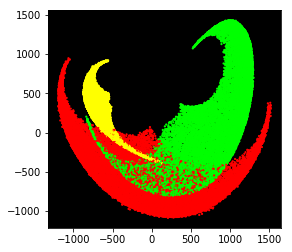

In [17]:
# Verify that they form three (mostly) separable clusters 

print("T=", T.shape)
print("P=", P.shape)
#print("T=", T) 

label0=0  # F
label1=1  # M
label2=2  # C

# Draw Scatter Plot
# For best effect, points should not be drawn in sequence but in random order
np.random.seed(0)
randomorder=np.random.permutation(np.arange(len(T)))
randomorder=np.arange(len(T))

# Set colors
cols=np.zeros((len(T),4))     # Initialize matrix to hold colors

for i,j in enumerate(T):
    if(j == label0): #Female
        cols[i]= [1,1,0,1] # 0 points are yellow (with opacity 0.25)
    elif(j == label1): #Male
        cols[i]= [1,0,0,1] # 1 points are red (with opacity 0.25)
    else:   #Children
        cols[i]= [0,1,0,1] # 2 points are green (with opacity 0.25)
        
#print("cols:",cols[1:20])

# Draw scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='black')
ax.scatter(P[randomorder,0],P[randomorder,1],s=5,linewidths=0,facecolors=cols[randomorder,:],marker="o");
ax.set_aspect('equal')

#plt.gca().invert_yaxis()
plt.show()

# Its not clearly separable clusters. we see lot of overlap between clusters

### Load Testing dataset

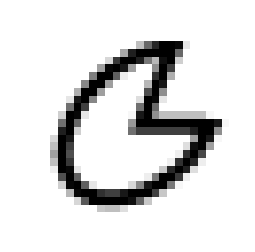

Xt: (10000, 784)
Tt: (10000, 1)


In [18]:
images, labels = load_NMNIST('testing', digits=[0,1,2])

flatimages = list()
for i in images:
    flatimages.append(i.ravel())
Xt = asarray(flatimages) # X now contains 60000 feature vectors, each of dimension 784
Tt=labels # T contains class labels with 0->Triangle, 1->Square, 2->Pizza
vectortoimg(X[1])

print("Xt:" , Xt.shape)#, X[20:22,300:400])
print("Tt:" , Tt.shape)#, T)

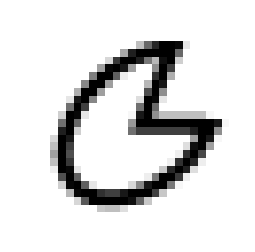

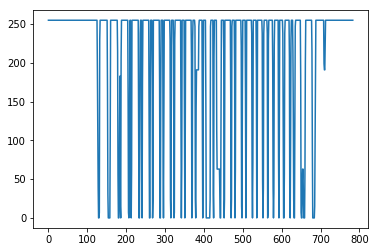

In [19]:
vectortoimg(X[1])
plt.plot(X[1])

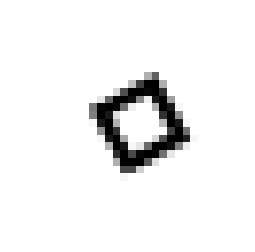

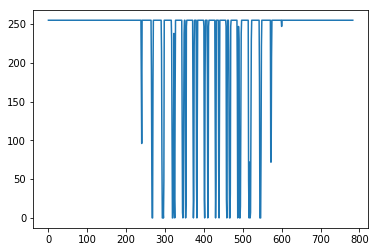

In [20]:
vectortoimg(Xt[8])
plt.plot(Xt[8])

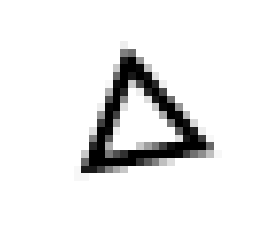

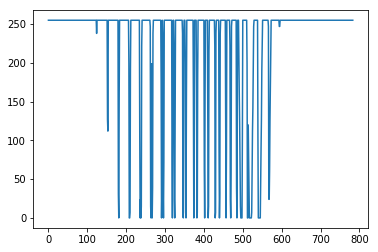

In [21]:
vectortoimg(Xt[11])
plt.plot(Xt[11])

### Test entire Testing set by building XZCVPR -> to reduce from 784 dims to fewer Principal Component dims

In [22]:
def calculatePCforFeatureVectFromTestingSet(X, n):
    
    print("xp shape=",X.shape)

    # Transform 784 feature vector into 2 features vector using XZCVP process
    # Subtract the mean vector computed previously to calculate 𝒛=𝒙−𝝁
    # Z computations Z = X - xmean
    Z = X - mu
    print("zp:", Z.shape)

    # Verify Z , by computing mean vector of Z. The result must be vector of 0s 
    #zmean = np.mean(zp, axis=0)
    #print("Mean vector of zp:", zmean) # close to 0s, but not 0

    # Find the first two principal components of 𝒛 as {𝑝_1,𝑝_2 }=𝒛 [■8(First eigenvector@Second eigenvector)]^T
    P = np.dot(Z,V.T);
    print("pp shape", P.shape)
    #print("P", P) #Principal components

    # Compute Pred - P reduced into 2 Principal components
    Pred = P[:,0:n]
    print("ppred:" , Pred.shape)  # Nx2
    print("ppred mean:" , np.mean(Pred,axis=0))  # Mean of Pred should be close to 0

    # Compute R (reconstructed zp)
    R = np.dot(P,V);
    #print("rp - zp : " , rp - zp) #Z is recovered since R-Z is seen to contain very small values

    # Compute xrecp (reconstructed xp) 
    xrecp = R + mu;
    #print("xrecp - xp :",xrecp - xp) #X is recovered since Xrec-X is seen to contain very small values

    return Pred

# for testing only
Pc2 = calculatePCforFeatureVectFromTestingSet(Xt, 2)#[0:5,:])
print("Pc2=", Pc2.shape)

Pc3 = calculatePCforFeatureVectFromTestingSet(Xt, 3)#[0:5,:])
print("Pc3=", Pc3.shape)

Pc10 = calculatePCforFeatureVectFromTestingSet(Xt, 10)#[0:5,:])
print("Pc10=", Pc10.shape)

xp shape= (10000, 784)
zp: (10000, 784)
pp shape (10000, 784)
ppred: (10000, 2)
ppred mean: [-84.20912089 384.20392961]
Pc2= (10000, 2)
xp shape= (10000, 784)
zp: (10000, 784)
pp shape (10000, 784)
ppred: (10000, 3)
ppred mean: [-84.20912089 384.20392961 138.47416217]
Pc3= (10000, 3)
xp shape= (10000, 784)
zp: (10000, 784)
pp shape (10000, 784)
ppred: (10000, 10)
ppred mean: [ -84.20912089  384.20392961  138.47416217   -2.82406823    3.54549627
   15.71023233  -10.97621763 -270.33050823   -5.33518484    8.04051366]
Pc10= (10000, 10)


### Apply EM algorithm using GaussianMixture on Pc2 - for 3 classes

In [33]:


# Build model with default init_params
gmModel = GaussianMixture(n_components=3, covariance_type='full',verbose=0,verbose_interval=100,
                          tol=0.0001,max_iter=10000,n_init=10,warm_start=True)

print("gmModel:", gmModel)


gmModel: GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=10000,
        means_init=None, n_components=3, n_init=10, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.0001, verbose=0,
        verbose_interval=100, warm_start=True, weights_init=None)


In [24]:

# fit a Gaussian Mixture Model with 2 components
gmModel.fit(Pred)
print("fit done")

result2 = gmModel.predict(Pc2)
print("result2:" , result2.shape, result2)

prob = gmModel.predict_proba(Pc2)
print("Prob:", prob)

inParams = gmModel.get_params()
print("Input Params:", inParams)

logLike = gmModel.score(Pc2) # Loglikelihood
print("LogLikelihood:", logLike)


fit done
result2: (10000,) [0 0 2 ... 1 1 1]
Prob: [[8.74504524e-01 3.05500470e-21 1.25495476e-01]
 [5.67096732e-01 1.07755142e-22 4.32903268e-01]
 [4.30931182e-01 3.98713263e-20 5.69068818e-01]
 ...
 [1.58729916e-35 9.99999255e-01 7.45057476e-07]
 [9.01512569e-38 9.91969410e-01 8.03058994e-03]
 [2.76231934e-12 9.98923549e-01 1.07645118e-03]]
Input Params: {'covariance_type': 'full', 'init_params': 'kmeans', 'max_iter': 10000, 'means_init': None, 'n_components': 3, 'n_init': 100, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.0001, 'verbose': 0, 'verbose_interval': 100, 'warm_start': True, 'weights_init': None}
LogLikelihood: -17.64636873945341


### Compare EM result with actuals

In [25]:

def compareResults(X,T):
    TP = 0;
    
    for i,val in enumerate(X):
        if(X[i] == T[i]):
            TP = TP + 1
    return [TP, len(X)]      
    
print("Accuracy Results:", compareResults(result2,Tt))

# Max Accuracy obtained is [4632, 10000]
        

Accuracy Results: [2563, 10000]


### Apply EM algorithm using GaussianMixture on Pc3

In [28]:
print(Pred3.shape)
print(Pc3.shape)
# fit a Gaussian Mixture Model with 3 components
gmModel.fit(Pred3)

result3 = gmModel.predict(Pc3)
print("result3:" , result3.shape, result3)

prob = gmModel.predict_proba(Pc3)
print("Prob:", prob)

inParams = gmModel.get_params()
print("Input Params:", inParams)

logLike = gmModel.score(Pc3) # Loglikelihood
print("LogLikelihood:", logLike)


(60000, 3)
(10000, 3)
result3: (10000,) [2 1 1 ... 0 0 0]
Prob: [[1.09611468e-024 6.64910092e-003 9.93350899e-001]
 [4.69412775e-028 1.00000000e+000 6.17816364e-020]
 [3.17353383e-025 1.00000000e+000 5.07922152e-023]
 ...
 [1.00000000e+000 3.28374444e-013 0.00000000e+000]
 [9.75306293e-001 2.46937070e-002 2.62556159e-141]
 [9.99998138e-001 1.86164053e-006 1.50673097e-264]]
Input Params: {'covariance_type': 'full', 'init_params': 'kmeans', 'max_iter': 10000, 'means_init': None, 'n_components': 3, 'n_init': 100, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.0001, 'verbose': 0, 'verbose_interval': 100, 'warm_start': True, 'weights_init': None}
LogLikelihood: -26.025355975229


### Compare EM (Pc3) results with actuals

In [29]:

def compareResults(X,T):
    TP = 0;
    
    for i,val in enumerate(X):
        if(X[i] == T[i]):
            TP = TP + 1
    return [TP, len(X)]      
    
print("Accuracy Results:", compareResults(result3,Tt))

# Max Accuracy obtained is [4600, 10000]
        

Accuracy Results: [5202, 10000]


### Apply EM algorithm using GaussianMixture on Pc10

In [34]:

# fit a Gaussian Mixture Model with 3 components
gmModel.fit(Pred10)

result10 = gmModel.predict(Pc10)
print("result10:" , result10.shape, result10)

prob = gmModel.predict_proba(Pc10)
print("Prob:", prob)

inParams = gmModel.get_params()
print("Input Params:", inParams)

logLike = gmModel.score(Pc10) # Loglikelihood
print("LogLikelihood:", logLike)


result10: (10000,) [2 0 0 ... 0 0 1]
Prob: [[0.00000000e+000 0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 0.00000000e+000 1.17557676e-011]
 [1.00000000e+000 0.00000000e+000 4.28524559e-013]
 ...
 [1.00000000e+000 7.18569098e-045 9.97751784e-102]
 [1.00000000e+000 1.03210011e-227 9.25044871e-022]
 [1.14977294e-048 1.00000000e+000 2.00500493e-104]]
Input Params: {'covariance_type': 'full', 'init_params': 'kmeans', 'max_iter': 10000, 'means_init': None, 'n_components': 3, 'n_init': 10, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.0001, 'verbose': 0, 'verbose_interval': 100, 'warm_start': True, 'weights_init': None}
LogLikelihood: -83.76035239522867


### Compare EM (Pred10) results with actuals

In [35]:
def compareResults(X,T):
    TP = 0;
    
    for i,val in enumerate(X):
        if(X[i] == T[i]):
            TP = TP + 1
    return [TP, len(X)]      
    
print("Accuracy Results:", compareResults(result10,Tt))

# Max Accuracy obtained is [5917, 10000]

Accuracy Results: [3191, 10000]


### Separate out classes 

result10: [2 2 2 2 1 0 2 2 0 0 2 1 1 0 2 0 2 2 1 0 2 0 1 2 2 0 2 0 2 2 2 0 2 2 2 0 0
 1 0 2 1 0 2 2 2 2 0 2 0 0]
Pc10: (10000, 10) [[ 1.15797598e+03  2.71530431e+01  8.42703135e+02 ...  4.14029982e+02
   8.75069396e+01  1.29354071e+01]
 [ 1.31821725e+03 -3.20290881e+02  4.19370168e+02 ...  3.32040114e+02
   2.06640870e+02 -3.24553728e+02]
 [ 1.23867226e+03 -4.79723320e+02  4.06744884e+02 ...  2.46388522e+02
   1.09860646e+02  1.92408933e-01]
 ...
 [-1.08864801e+03  8.75899011e+02  4.52318750e+02 ...  2.91398283e+01
   2.46557815e+01  1.05450651e+01]
 [-1.10501898e+03  5.30242003e+01 -3.29127870e+02 ...  3.50259140e+02
   2.15690905e+01 -1.57809959e+02]
 [-3.37618777e+02  1.10879649e+03  7.22970667e+02 ... -8.51122954e+02
  -3.30639674e+01  9.17453962e+01]]
P1: [[-616.46775251  895.75477187  579.66605589   67.08613418   60.80255726
    34.08878674  -21.1376446  -623.53765068  -12.45526042   26.48757598]]
P2: [[-803.52963489 -490.30152957 -547.29478572    7.74587047   -5.09142098
   -21.

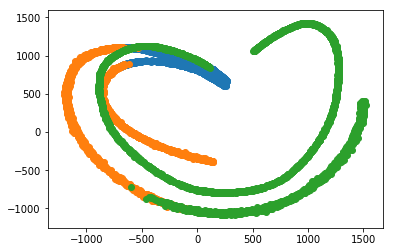

In [135]:
print("result10:",result10[0:50])

[P1, P2, P3, P4, P5] = splitDataIntoClasses(Pc10,result10)

print("Pc10:" ,Pc10.shape, Pc10)

print("P1:", P1[0:1])
print("P2:" ,P2[0:1])
print("P3:" ,P3[0:1])
print("P test sample count for class 0,1,2:", len(P1), len(P2), len(P3))

# Scatter plot ............
#plt.scatter(Pred[:,0],Pred[:,1])
plt.scatter(P1[:,0],P1[:,1])
plt.scatter(P2[:,0],P2[:,1])
plt.scatter(P3[:,0],P3[:,1])

### Plot all classes from Testing set

Checking multiple testing vectors by plotting images.
Be patient:


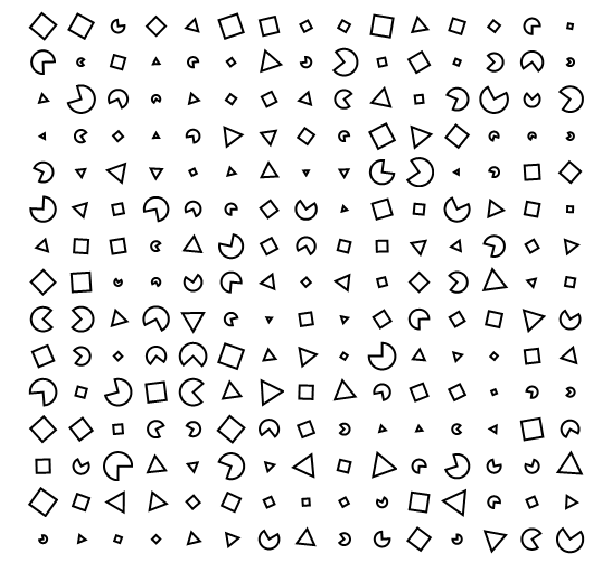

In [133]:
print("Checking multiple testing vectors by plotting images.\nBe patient:")
plt.close('all')
fig = plt.figure(figsize=(10,10))
nrows=15
ncols=15
for row in range(nrows):
    for col in range(ncols):
        #print("row*ncols+col + 1", row*ncols+col + 1)
        plt.subplot(nrows, ncols, row*ncols+col + 1)
        vectortoimg(Xt[row*ncols+col + 1],show=False)
        #vectortoimg(X[np.random.randint(len(T))],show=False)
plt.show()

### Plot results to visualize 3 class distribution

EM predicted class o result
Checking multiple training vectors by plotting images for class: 0 
Be patient:
T.shape (10000,)


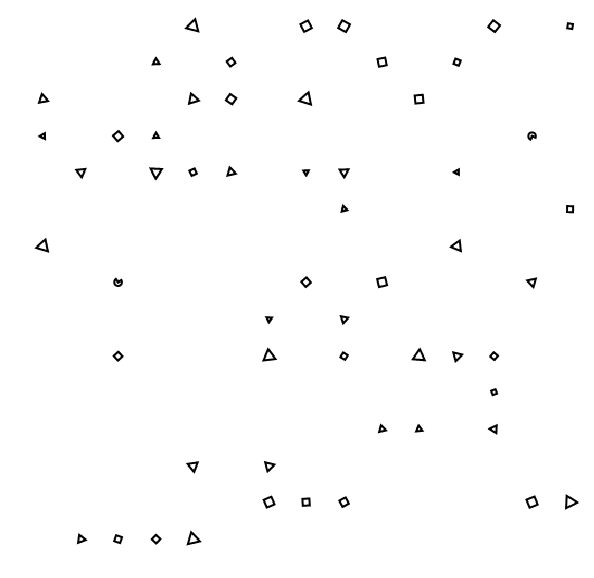

Actual class o result
Checking multiple training vectors by plotting images for class: 0 
Be patient:
T.shape (10000, 1)


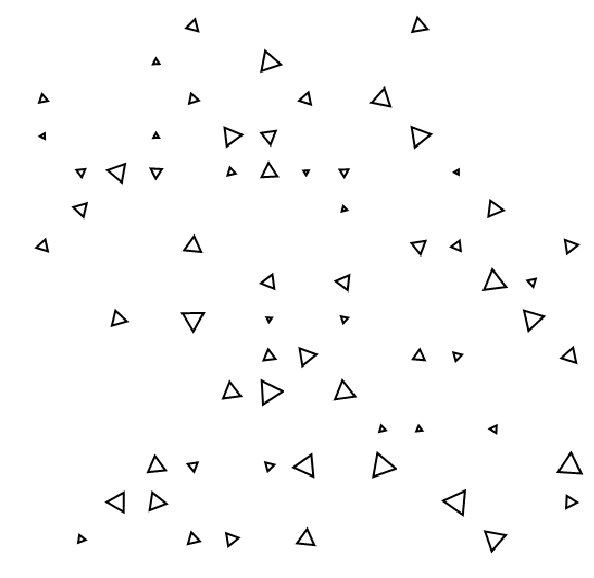

EM predicted class 1 result
Checking multiple training vectors by plotting images for class: 1 
Be patient:
T.shape (10000,)


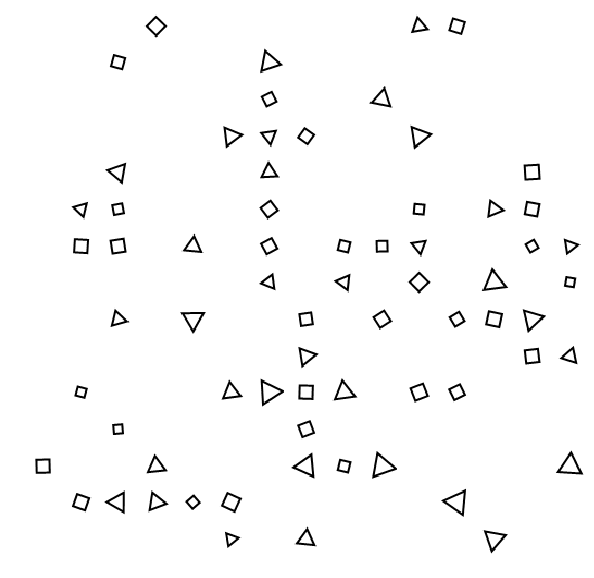

Actual class 1 result
Checking multiple training vectors by plotting images for class: 1 
Be patient:
T.shape (10000, 1)


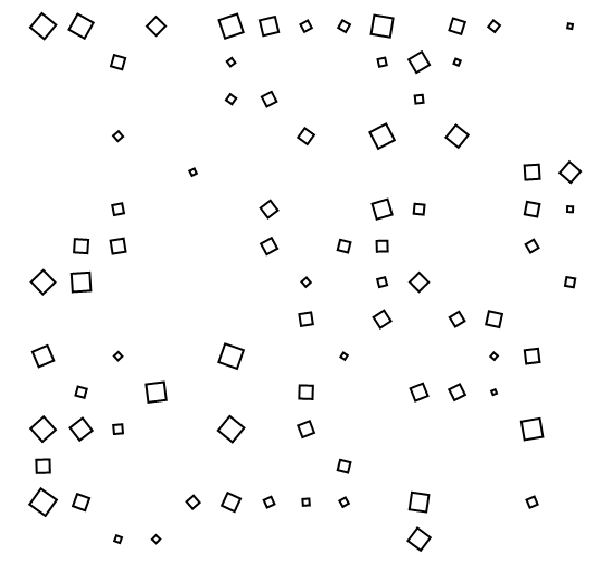

EM predicted class 2 result
Checking multiple training vectors by plotting images for class: 2 
Be patient:
T.shape (10000,)


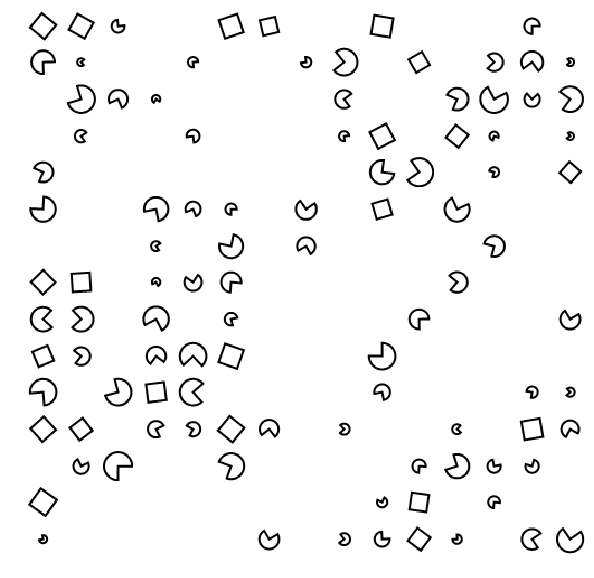

Actual class 2 result
Checking multiple training vectors by plotting images for class: 2 
Be patient:
T.shape (10000, 1)


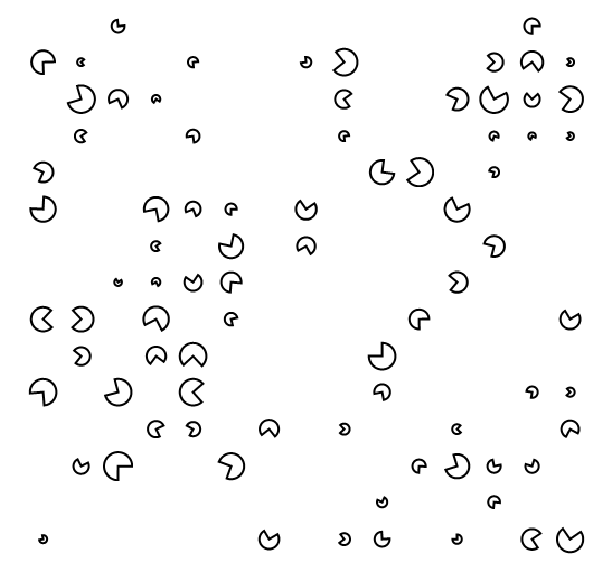

In [138]:
#Checking multiple training vectors by plotting images - for a class
def vectortoimgMlt(X,T,nrows,ncols,classLabel):
    print("Checking multiple training vectors by plotting images for class:",classLabel,"\nBe patient:")
    print("T.shape", T.shape)
    plt.close('all')
    fig = plt.figure(figsize=(10,10))
    for row in range(nrows):
        for col in range(ncols):
            if(classLabel == T[row*ncols+col + 1]):
                #print(T[row*ncols+col + 1], row*ncols+col + 1)
                plt.subplot(nrows, ncols, row*ncols+col + 1)
                vectortoimg(X[row*ncols+col + 1],show=False)
    plt.show()

print("EM predicted class 0 result") 
vectortoimgMlt(Xt,result10,15,15,0)
print("Actual class o result")
vectortoimgMlt(Xt,Tt,15,15,0)

print("EM predicted class 1 result") 
vectortoimgMlt(Xt,result10,15,15,1)
print("Actual class 1 result")
vectortoimgMlt(Xt,Tt,15,15,1)

print("EM predicted class 2 result") 
vectortoimgMlt(Xt,result10,15,15,2)
print("Actual class 2 result")
vectortoimgMlt(Xt,Tt,15,15,2)

### Apply EM algorithm using GaussianMixture on Pc3 - for 5 classes

In [90]:
# Build model with default init_params
gmModel5 = GaussianMixture(n_components=5, covariance_type='full',verbose=0,verbose_interval=100,
                          tol=0.0001,max_iter=10000,n_init=100,warm_start=True)

print("gmModel5:", gmModel5)

gmModel5: GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=10000,
        means_init=None, n_components=5, n_init=100, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.0001, verbose=0,
        verbose_interval=100, warm_start=True, weights_init=None)


In [89]:
# fit a Gaussian Mixture Model with 5 components
gmModel5.fit(Pc3)

result_c5 = gmModel5.predict(Pc3)
print("result_c5:" , result_c5.shape, result_c5)

prob = gmModel5.predict_proba(Pc3)
print("Prob:", prob)

inParams = gmModel5.get_params()
print("Input Params:", inParams)

logLike = gmModel5.score(Pc3) # Loglikelihood
print("LogLikelihood:", logLike)

result_c5: (10000,) [3 3 3 ... 2 0 1]
Prob: [[1.02328873e-008 0.00000000e+000 1.54637580e-028 9.99999990e-001
  1.51469222e-246]
 [6.71808157e-007 0.00000000e+000 1.43530706e-037 9.99999328e-001
  0.00000000e+000]
 [1.90020456e-005 0.00000000e+000 3.38322545e-036 9.99980998e-001
  0.00000000e+000]
 ...
 [1.92442125e-005 7.66621990e-027 9.99980756e-001 2.63457466e-054
  0.00000000e+000]
 [9.27111031e-001 6.24946753e-112 7.28889690e-002 3.64405194e-053
  6.27718302e-034]
 [6.03766485e-008 6.86919896e-001 3.13080044e-001 2.59113799e-029
  0.00000000e+000]]
Input Params: {'covariance_type': 'full', 'init_params': 'kmeans', 'max_iter': 10000, 'means_init': None, 'n_components': 5, 'n_init': 100, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.0001, 'verbose': 0, 'verbose_interval': 100, 'warm_start': True, 'weights_init': None}
LogLikelihood: -20.984614774459843


### Separate out images based on classification results

Pc3: (10000, 3) [[ 1157.97597542    27.15304313   842.70313538]
 [ 1318.21724508  -320.29088056   419.37016842]
 [ 1238.67226315  -479.72331976   406.74488427]
 ...
 [-1088.64801242   875.89901138   452.31875001]
 [-1105.0189821     53.02420029  -329.12786975]
 [ -337.61877654  1108.79649341   722.97066744]]
P1: [[-654.25777236 1100.58509024  806.57968504]
 [-631.32399439 1107.58976712  813.58527969]
 [ 198.23109779  657.72577734  151.4722858 ]
 [  78.79761439  874.03260208  425.94807826]
 [ 202.02760991  685.36943651  160.96872813]]
P2: [[ -883.13791566   705.20604161    -5.9982738 ]
 [ -616.46775251   895.75477187   579.66605589]
 [ -724.06642452  1110.37423865   804.16634906]
 [ -854.82903407   592.0741087    436.568772  ]
 [-1157.67301195   262.61076909  -176.61845847]]
P test sample count: 2767 2500 1313 799 2621


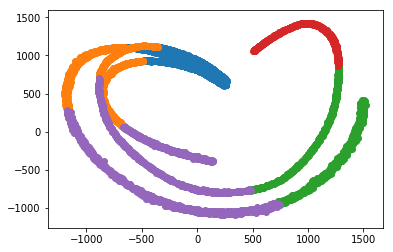

In [91]:

[P1, P2, P3, P4, P5] = splitDataIntoClasses(Pc3,result_c5)

print("Pc3:" ,Pc3.shape, Pc3)

print("P1:", P1[0:5])
print("P2:" ,P2[0:5])

print("P test sample count:", len(P1), len(P2), len(P3),len(P4),len(P5))

# Scatter plot ............
#plt.scatter(Pred[:,0],Pred[:,1])
plt.scatter(P1[:,0],P1[:,1])
plt.scatter(P2[:,0],P2[:,1])
plt.scatter(P3[:,0],P3[:,1])
plt.scatter(P4[:,0],P4[:,1])
plt.scatter(P5[:,0],P5[:,1])

### Plot results to visualize 5 class distribution

Checking multiple training vectors by plotting images for class: 0 
Be patient:
T.shape (10000,)


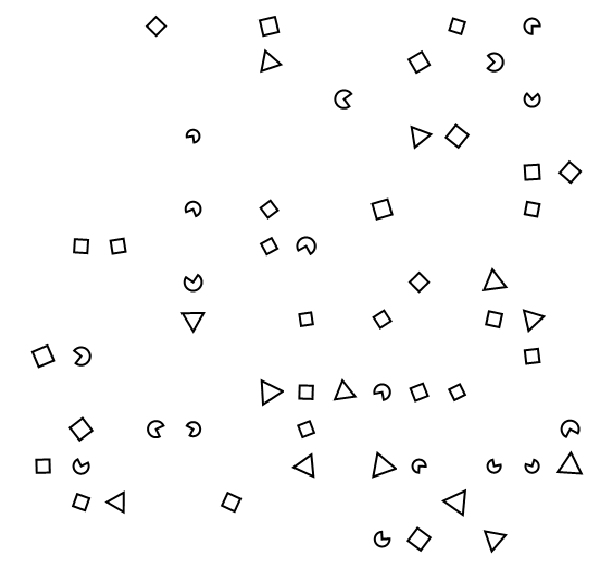

Checking multiple training vectors by plotting images for class: 1 
Be patient:
T.shape (10000,)


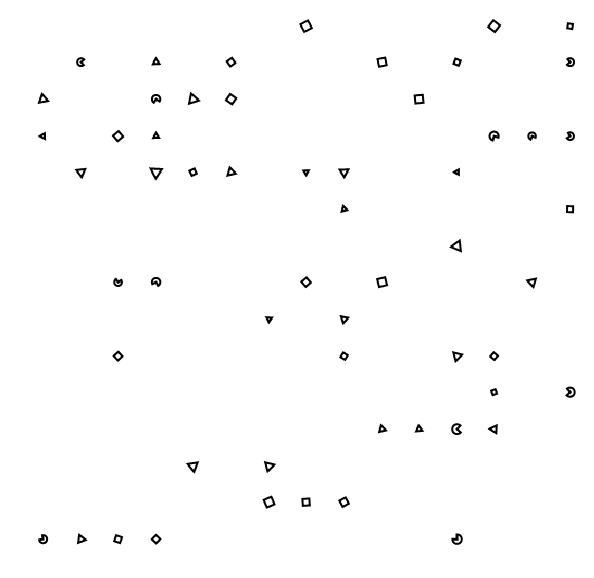

Checking multiple training vectors by plotting images for class: 2 
Be patient:
T.shape (10000,)


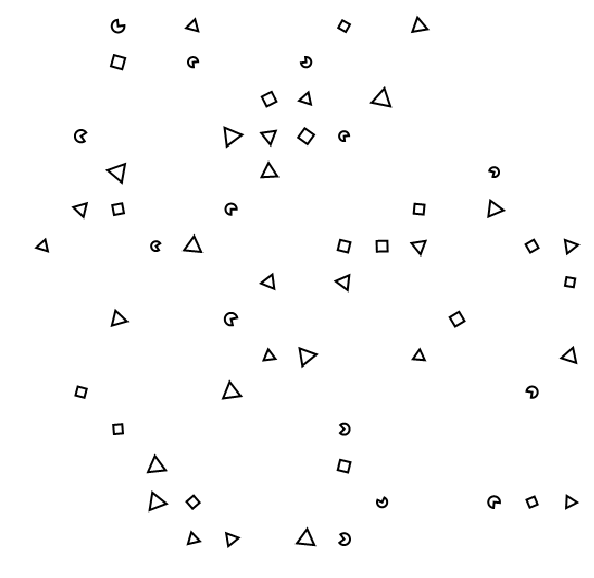

Checking multiple training vectors by plotting images for class: 3 
Be patient:
T.shape (10000,)


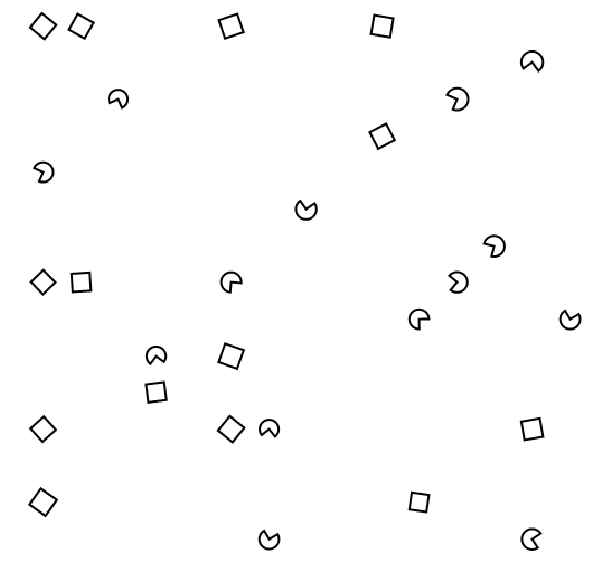

Checking multiple training vectors by plotting images for class: 4 
Be patient:
T.shape (10000,)


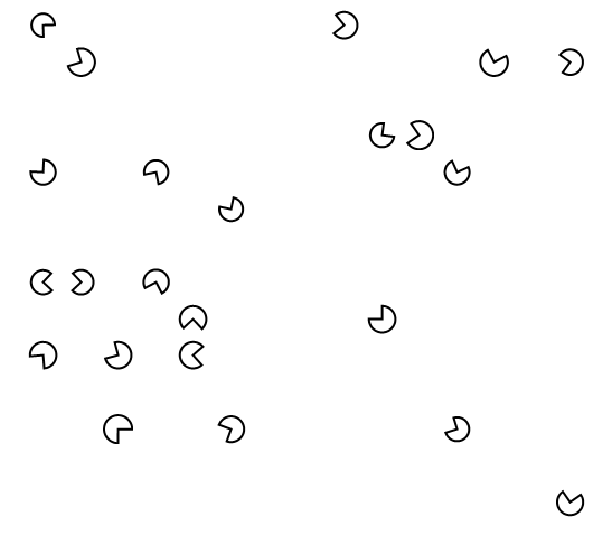

In [92]:
  
vectortoimgMlt(Xt,result_c5,15,15,0)
vectortoimgMlt(Xt,result_c5,15,15,1)
vectortoimgMlt(Xt,result_c5,15,15,2)
vectortoimgMlt(Xt,result_c5,15,15,3)
vectortoimgMlt(Xt,result_c5,15,15,4)